# <font color='green'> Image Classification using CNN </font>

### <font color='purple'> Import important libraries</font>

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

### <font color='purple'> Read Dataset Images From Training Folder</font>

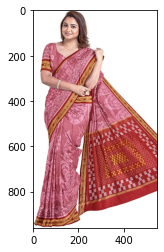

In [2]:
img=image.load_img("E:/FlipRobo/Image Scraping and Classification Project/Training/Sharee/53.jpg")
plt.imshow(img)

### <font color='purple'> Data Augmentation and Normalize the Images </font>

In [3]:
train=ImageDataGenerator(rescale=1./255)
validation=ImageDataGenerator(rescale=1/255)

### <font color='purple'> Train Validation and Test Split</font>

In [4]:
train_dataset=train.flow_from_directory('E:/FlipRobo/Image Scraping and Classification Project/Training/',
                                       target_size=(200,200), batch_size=32,
                                       class_mode="sparse")

Found 542 images belonging to 3 classes.


In [5]:
validation_dataset=train.flow_from_directory('E:/FlipRobo/Image Scraping and Classification Project/Validation/',
                                       target_size=(200,200),
                                       batch_size=20,
                                       class_mode="sparse")

Found 181 images belonging to 3 classes.


In [6]:
train_dataset.class_indices

{'Jeans': 0, 'Sharee': 1, 'Shirt': 2}

### <font color='purple'> Create the Sequential Model and Add the Layers </font>

In [7]:
model=Sequential()

In [8]:
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=[200,200,3]))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

In [9]:
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

In [10]:
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(units=128, activation="relu"))

In [13]:
model.add(Dense(units=3, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        1

### <font color="purple">Configure the optimizer and compile the model </font>

In [15]:
model.compile(optimizer= 'adam', loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

In [16]:
hist=model.fit(train_dataset, epochs=10, batch_size=20, validation_data=validation_dataset)

Epoch 1/10
17/17 [==============================] - 21s 1s/step - loss: 1.4996 - sparse_categorical_accuracy: 0.8616 - val_loss: 2.6543 - val_sparse_categorical_accuracy: 0.5801
Epoch 2/10
17/17 [==============================] - 10s 611ms/step - loss: 0.1220 - sparse_categorical_accuracy: 0.9742 - val_loss: 7.3603 - val_sparse_categorical_accuracy: 0.5249
Epoch 3/10
17/17 [==============================] - 10s 616ms/step - loss: 0.0370 - sparse_categorical_accuracy: 0.9889 - val_loss: 2.5672 - val_sparse_categorical_accuracy: 0.7293
Epoch 4/10
17/17 [==============================] - 11s 628ms/step - loss: 0.0209 - sparse_categorical_accuracy: 0.9908 - val_loss: 1.4674 - val_sparse_categorical_accuracy: 0.7569
Epoch 5/10
17/17 [==============================] - 10s 615ms/step - loss: 0.0048 - sparse_categorical_accuracy: 0.9963 - val_loss: 1.1474 - val_sparse_categorical_accuracy: 0.7680
Epoch 6/10
17/17 [==============================] - 10s 605ms/step - loss: 0.0235 - sparse_categor

### <font color="purple"> Plotting Train and Validation Accuracy </font>

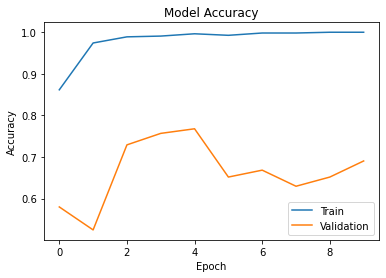

In [17]:
plt.plot (hist.history['sparse_categorical_accuracy'])
plt.plot (hist.history['val_sparse_categorical_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.savefig("Model_Accuracy.png")
plt.show()

<font color=blue>Here we see that while train accuracy is very high (100%), the validation accuracy is significantly low (54.14%) indicating overfitting.  
To avoid overfitting we will use the techniques below:

<font color=blue>Regularization </font>

In [18]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=[200,200,3]))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", kernel_regularizer=tf.keras.regularizers.l2(l=0.01),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same",kernel_regularizer=tf.keras.regularizers.l2(l=0.01), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=3, activation="softmax"))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)       

In [20]:
model.compile(optimizer= 'adam', loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

In [21]:
hist=model.fit(train_dataset, epochs=10, batch_size=20, validation_data=validation_dataset)

Epoch 1/10
17/17 [==============================] - 11s 636ms/step - loss: 2.5133 - sparse_categorical_accuracy: 0.8598 - val_loss: 2.5081 - val_sparse_categorical_accuracy: 0.4862
Epoch 2/10
17/17 [==============================] - 10s 616ms/step - loss: 0.9347 - sparse_categorical_accuracy: 0.9742 - val_loss: 4.4125 - val_sparse_categorical_accuracy: 0.3978
Epoch 3/10
17/17 [==============================] - 10s 606ms/step - loss: 0.7209 - sparse_categorical_accuracy: 0.9982 - val_loss: 4.6819 - val_sparse_categorical_accuracy: 0.4807
Epoch 4/10
17/17 [==============================] - 10s 610ms/step - loss: 0.7052 - sparse_categorical_accuracy: 0.9982 - val_loss: 6.2301 - val_sparse_categorical_accuracy: 0.5083
Epoch 5/10
17/17 [==============================] - 11s 620ms/step - loss: 0.6997 - sparse_categorical_accuracy: 0.9945 - val_loss: 6.1230 - val_sparse_categorical_accuracy: 0.4917
Epoch 6/10
17/17 [==============================] - 11s 635ms/step - loss: 0.7212 - sparse_cate

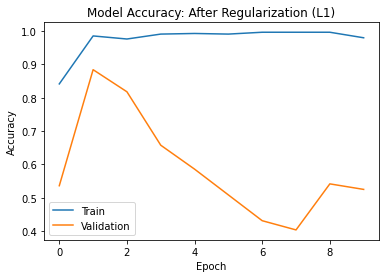

In [34]:
plt.plot (hist.history['sparse_categorical_accuracy'])
plt.plot (hist.history['val_sparse_categorical_accuracy'])
plt.title("Model Accuracy: After Regularization (L1)")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.show()

<font color='blue'> As Regularization does not work properly we will go with some other technique.</font>

<font color=blue>Weight Initialization </font>

In [23]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer='he_normal', input_shape=[200,200,3]))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", kernel_regularizer=tf.keras.regularizers.l2(l=0.01),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same",kernel_regularizer=tf.keras.regularizers.l2(l=0.01), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=3, activation="softmax"))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 64)       

In [25]:
model.compile(optimizer= 'Adam', loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

In [26]:
hist=model.fit(train_dataset, epochs=10, batch_size=20, validation_data=validation_dataset)

Epoch 1/10
17/17 [==============================] - 10s 617ms/step - loss: 2.2449 - sparse_categorical_accuracy: 0.8801 - val_loss: 5.1687 - val_sparse_categorical_accuracy: 0.7624
Epoch 2/10
17/17 [==============================] - 10s 617ms/step - loss: 0.9731 - sparse_categorical_accuracy: 0.9668 - val_loss: 16.8939 - val_sparse_categorical_accuracy: 0.5083
Epoch 3/10
17/17 [==============================] - 10s 609ms/step - loss: 0.8116 - sparse_categorical_accuracy: 0.9908 - val_loss: 10.9588 - val_sparse_categorical_accuracy: 0.6354
Epoch 4/10
17/17 [==============================] - 10s 606ms/step - loss: 0.8245 - sparse_categorical_accuracy: 0.9852 - val_loss: 17.1280 - val_sparse_categorical_accuracy: 0.5193
Epoch 5/10
17/17 [==============================] - 10s 610ms/step - loss: 0.7223 - sparse_categorical_accuracy: 0.9908 - val_loss: 4.7364 - val_sparse_categorical_accuracy: 0.8343
Epoch 6/10
17/17 [==============================] - 10s 606ms/step - loss: 0.7687 - sparse_c

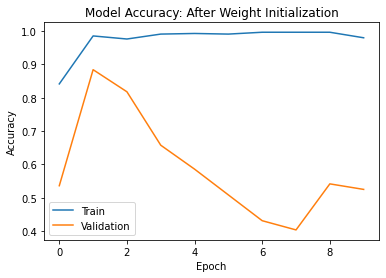

In [35]:
plt.plot (hist.history['sparse_categorical_accuracy'])
plt.plot (hist.history['val_sparse_categorical_accuracy'])
plt.title("Model Accuracy: After Weight Initialization")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.show()

<font color=blue>Dropout Regularization </font>

In [28]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer='he_normal', input_shape=[200,200,3]))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", kernel_regularizer=tf.keras.regularizers.l2(l=0.01),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same",kernel_regularizer=tf.keras.regularizers.l2(l=0.01), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=3, activation="softmax"))

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 50, 50, 32)       

In [30]:
model.compile(optimizer= 'Adam', loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

In [31]:
hist=model.fit(train_dataset, epochs=10, batch_size=20, validation_data=validation_dataset)

Epoch 1/10
17/17 [==============================] - 12s 702ms/step - loss: 2.6716 - sparse_categorical_accuracy: 0.8413 - val_loss: 3.2514 - val_sparse_categorical_accuracy: 0.5359
Epoch 2/10
17/17 [==============================] - 12s 690ms/step - loss: 0.8527 - sparse_categorical_accuracy: 0.9852 - val_loss: 1.2800 - val_sparse_categorical_accuracy: 0.8840
Epoch 3/10
17/17 [==============================] - 12s 695ms/step - loss: 0.8672 - sparse_categorical_accuracy: 0.9760 - val_loss: 1.7770 - val_sparse_categorical_accuracy: 0.8177
Epoch 4/10
17/17 [==============================] - 12s 681ms/step - loss: 0.7480 - sparse_categorical_accuracy: 0.9908 - val_loss: 4.1765 - val_sparse_categorical_accuracy: 0.6575
Epoch 5/10
17/17 [==============================] - 12s 680ms/step - loss: 0.7296 - sparse_categorical_accuracy: 0.9926 - val_loss: 5.5906 - val_sparse_categorical_accuracy: 0.5856
Epoch 6/10
17/17 [==============================] - 12s 682ms/step - loss: 0.7148 - sparse_cate

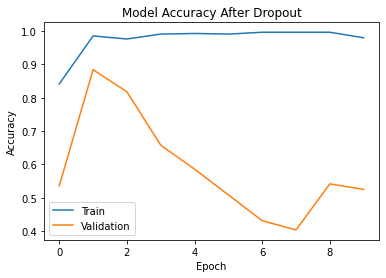

In [36]:
plt.plot (hist.history['sparse_categorical_accuracy'])
plt.plot (hist.history['val_sparse_categorical_accuracy'])
plt.title("Model Accuracy After Dropout")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.show()

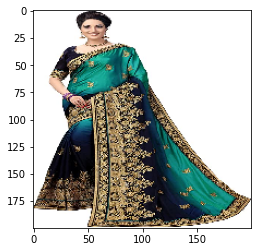

[0. 0. 1.]
It is a Shirt


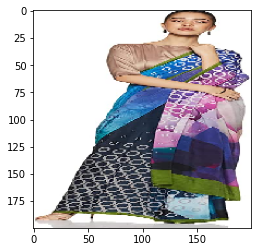

[0. 0. 1.]
It is a Shirt


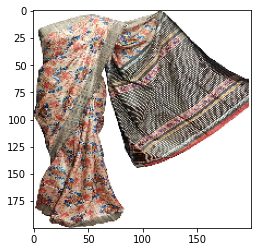

[0. 0. 1.]
It is a Shirt


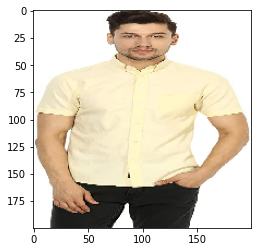

[0. 0. 1.]
It is a Shirt


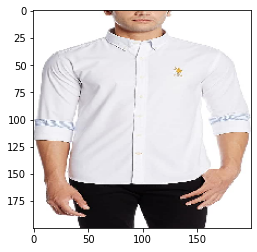

[0. 0. 1.]
It is a Shirt


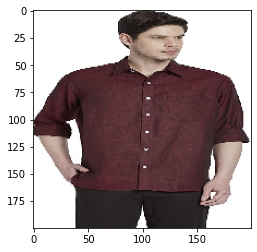

[0. 0. 1.]
It is a Shirt


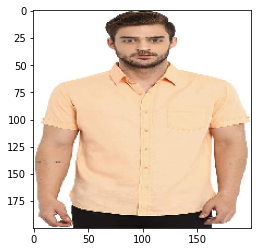

[0. 0. 1.]
It is a Shirt


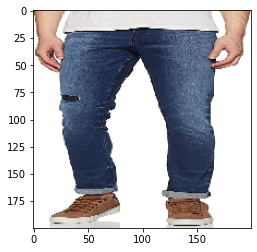

[0. 0. 1.]
It is a Shirt


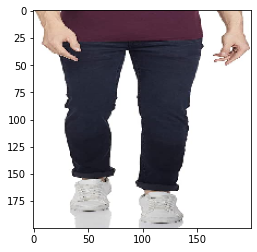

[1. 0. 0.]
It is a Jeans!!


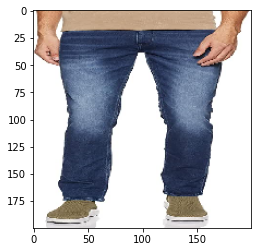

[0. 0. 1.]
It is a Shirt


In [33]:
dir_path='E:/FlipRobo/Image Scraping and Classification Project/Testing'

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X, axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    print (val[0])
    if val[0][0]>=1:
        print("It is a Jeans!!")
    elif val[0][1]>=1:
        print("It is a Sharee")
    else:
        print("It is a Shirt")
        